# **Phase #3**

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
cd = pd.read_csv('https://raw.githubusercontent.com/iRoseM/Brain-Stroke---Data-Mining-Project/main/Dataset%20Folder/Processed_dataset.csv')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
!pip install kneed
from kneed import KneeLocator
import numpy as np
import seaborn as sns

## Balancing dataset:
Since our dataset already meets the minimum balance percentage of 30% 70% after sampling in Phase 2, no further balancing was needed.

# **Classification:**

We trained Decision Tree classifiers using (entropy and Gini index) attribute selection measures. The classifiers were evaluated across different data partition sizes, specifically:
- 70% Training and 30% Test
- 80% Training and 20% Test
- 60% Training and 40% Test



<br>


To assess the models, we employed confusion matrices, which provide a detailed overview of the classification performance in terms of true and predicted classes. We also calculated key performance metrics based on the confusion matrices, including sensitivity, specificity, and precision:


- Sensitivity: represents how many did we correctly identify of all the actual positive cases.


*A higher sensitivity indicates that the model is good at identifying positive cases.*

- Specificity: represents how many did we correctly identify of all the actual negative cases.


*A higher specificity indicates that the model is good at identifying negative cases.*

- Precision: represents how many were actually positive of all the cases predicted as positive.


*A higher precision indicates that when the model predicts a positive case, it is more likely to be correct.*

<br>

Finally, we visualized the resulting decision tree using the tree function from Scikit-learn.

In [7]:
# preprocessed dataset is already loaded from github folder

# Mapping age labels to encoded values
age_mapping = {'Child': 0, 'Adult': 1, 'Older Adult': 2}
cd['age'] = cd['age'].map(age_mapping)

# Re-define X and y after mapping
fn = cd.keys().tolist() [:-1]
X = cd[fn]
y = cd['stroke']

## **Splitting data into 70% for Training and 30% for Testing:**

## - Information Gain (Entropy):

### - Model Training and Testing:

In [8]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# createdecision tree classifier object
clf1ent = DecisionTreeClassifier(criterion='entropy', random_state=1)

#Train decision tree classifier
clf1ent= clf1ent.fit(X_train, y_train)

# Make predictions
y_pred = clf1ent.predict(X_test)

# Compute Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )

Accuracy: 0.825


To make sure all tuples were taken by the model:

In [9]:
print (X_train.count(), X_test.count())

gender               560
age                  560
hypertension         560
heart_disease        560
ever_married         560
work_type            560
Residence_type       560
avg_glucose_level    560
bmi                  560
smoking_status       560
dtype: int64 gender               240
age                  240
hypertension         240
heart_disease        240
ever_married         240
work_type            240
Residence_type       240
avg_glucose_level    240
bmi                  240
smoking_status       240
dtype: int64


### - Model Evaluation:

#### Confusion Matrix:


[[145  22]
 [ 20  53]]


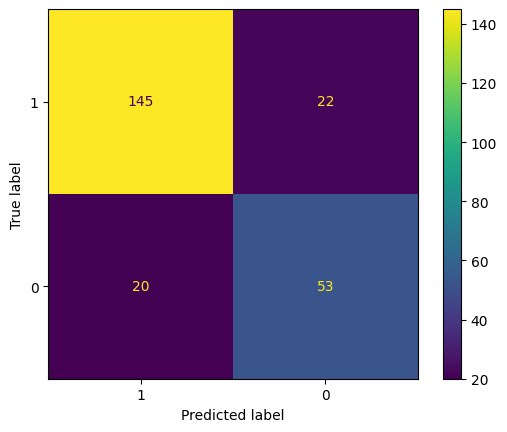

In [10]:
cm1ent = confusion_matrix(y_test, y_pred)
print(cm1ent)

cn=cd['stroke'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf1ent, X_test, y_test, display_labels=cn)

#### Findings:

- True Positives (TP) : This reflects the number of instances accurately identified as belonging to the positive class, and it equals 145 here.
- False Positives (FP) : This indicates the number of instances incorrectly classified as positive when they are actually negative, and it equals 22 here.


- True Negatives (TN) : This represents the number of instances accurately identified as belonging to the negative class, and it equals 53 here.
- False Negatives (FN) : This shows the number of instances incorrectly classified as negative when they are, in fact, positive, and equals 20 here.


<br>
*This classifier is having good accuracy, because most tuples are represented along the diagonal(TN + TP) of the confusion matrix.*

In [11]:
# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm1ent[1, 1]
TN = cm1ent[0, 0]
FP = cm1ent[0, 1]
FN = cm1ent[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Sensitivity: 0.726027397260274
Specificity: 0.8682634730538922
Precision: 0.7066666666666667


#### Findings:

- Sensitivity: 0.72 - The model correctly identifies 72% of actual positive cases (strokes), missing 28%.

- Specificity: 0.86 - The model accurately detects 86% of actual negative cases (no strokes), with a 14% false positive rate.

- Precision: 0.70 - When predicting strokes, the model is correct 70% of the time, suggesting a need to reduce false positives.


<br>
*Overall, the model shows good specificity but moderate sensitivity and precision, highlighting opportunities for improvement to enhance detection and reduce misclassifications.*

### - Visualizing and Saving Decision Trees:

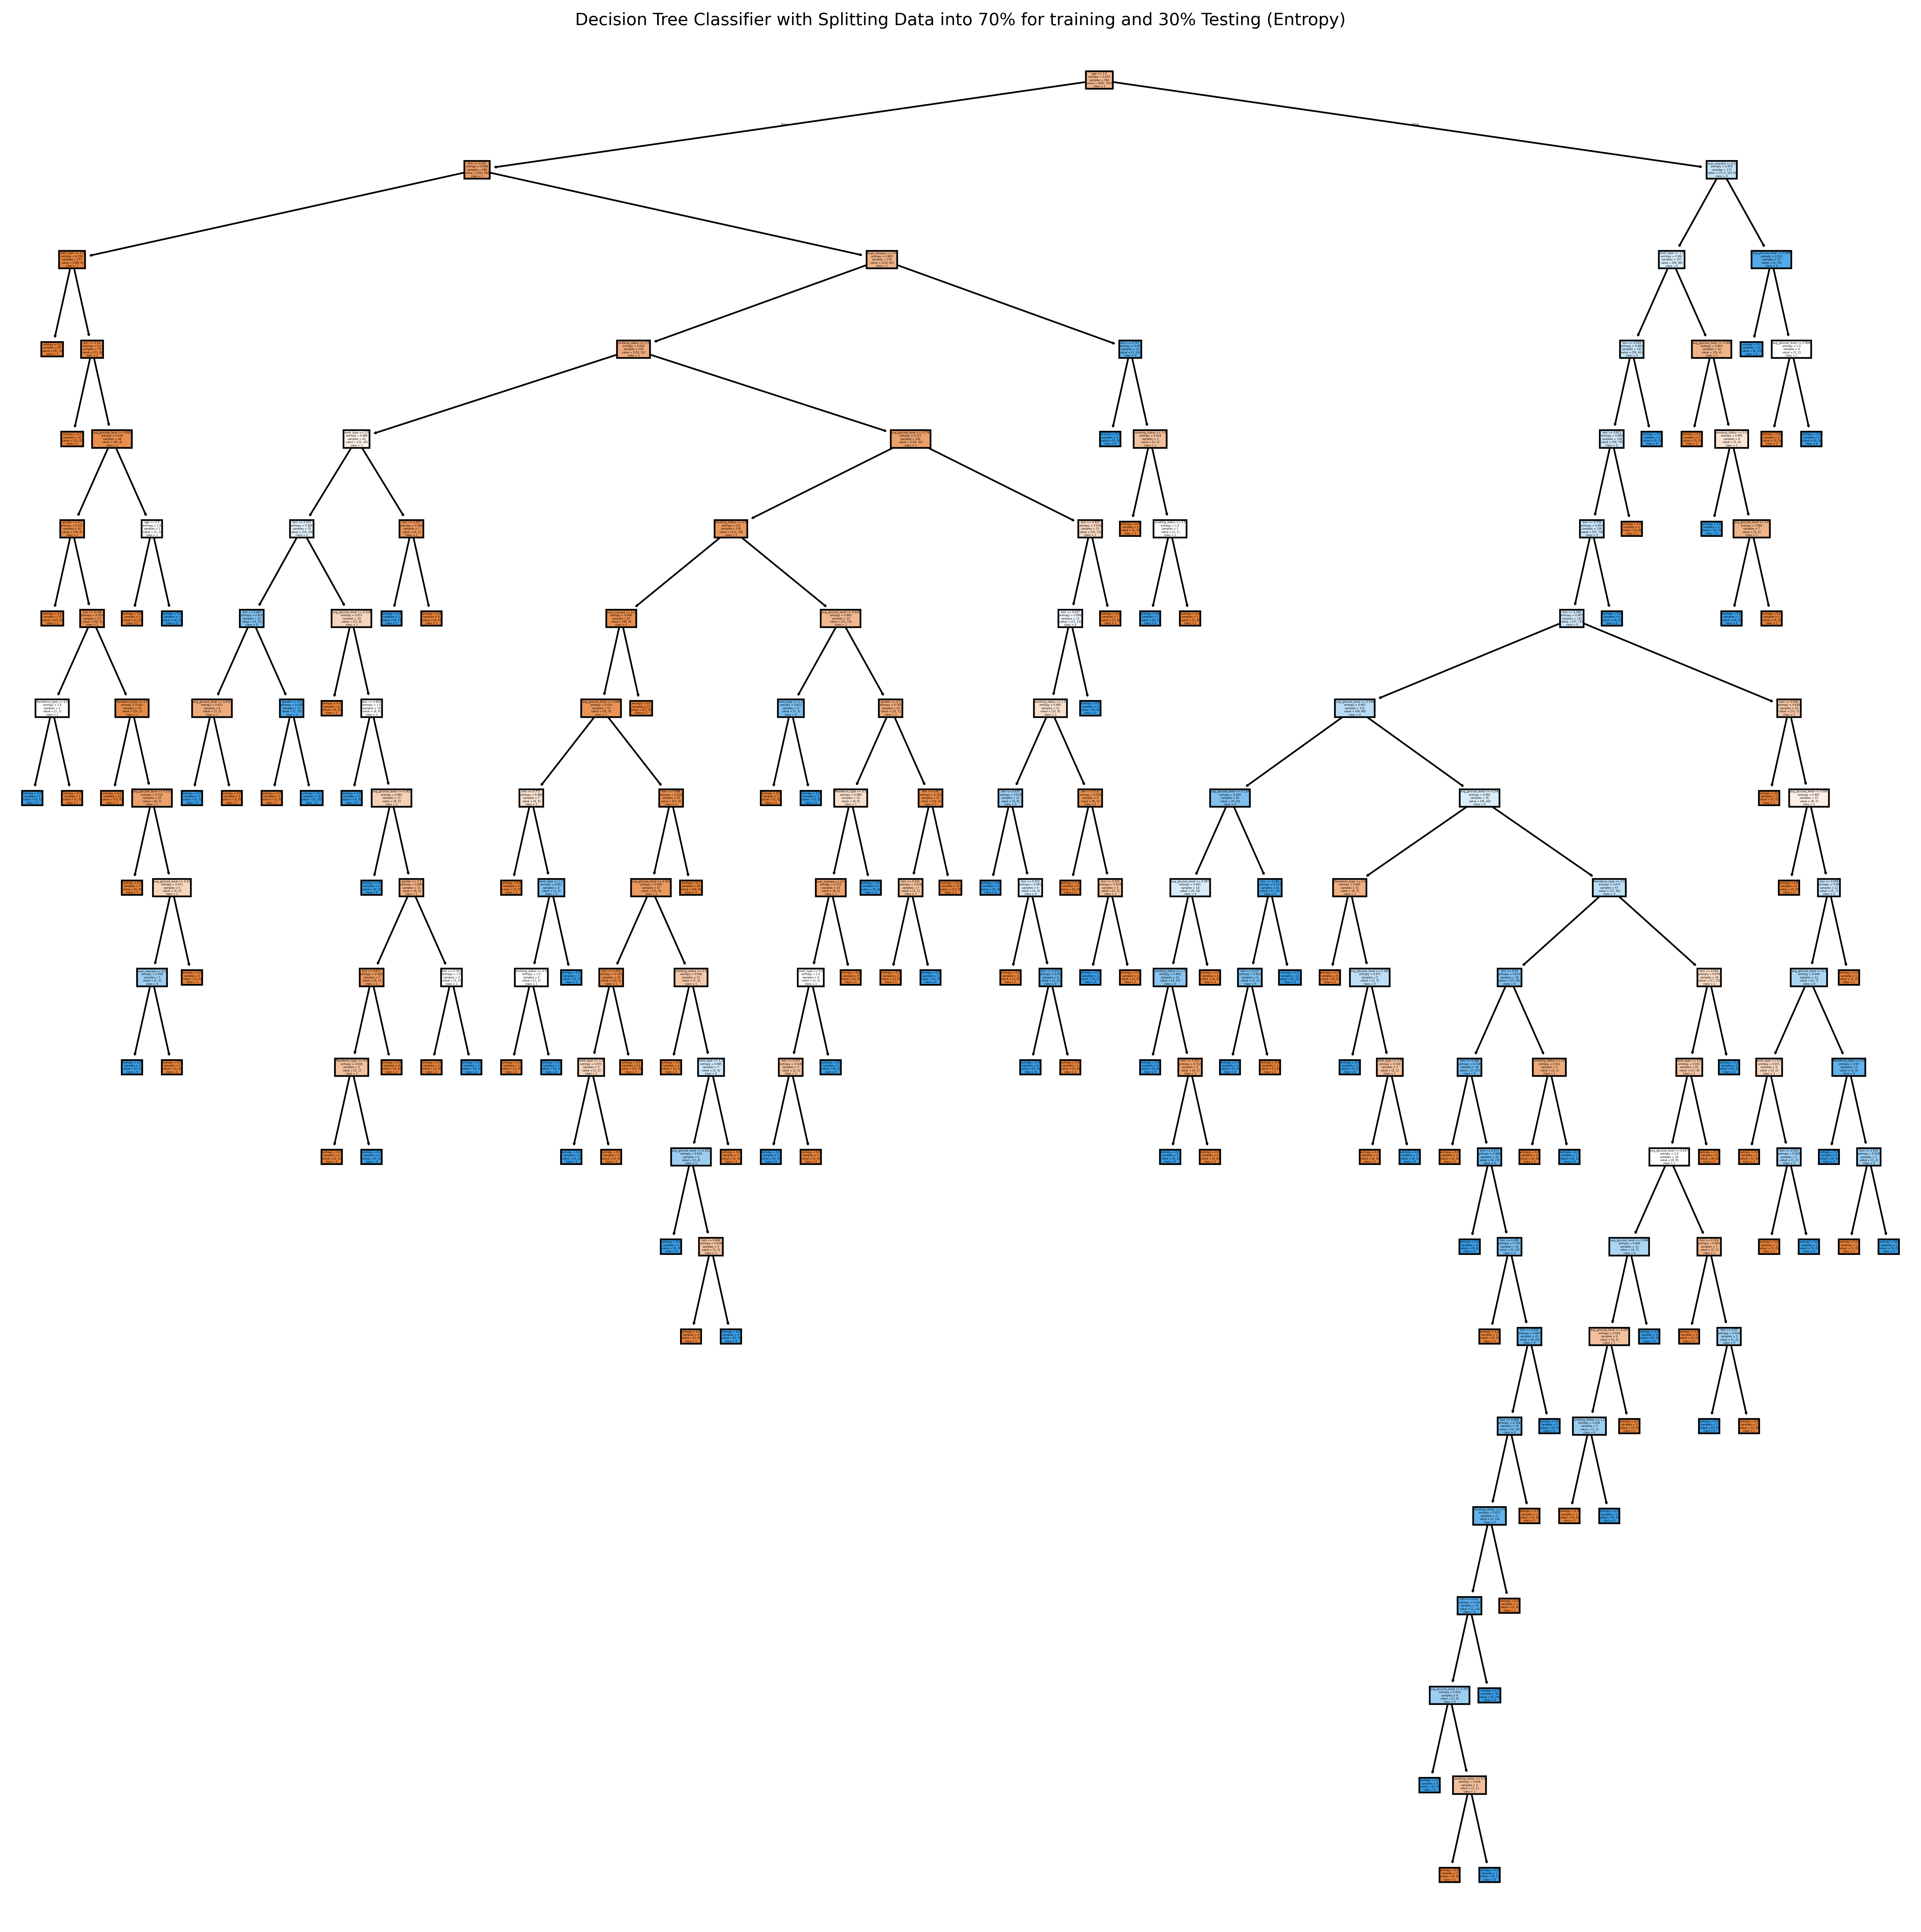

In [12]:
# Ensure class_names is a list of strings
class_names = [str(cls) for cls in y.unique()]

fig, ax = plt.subplots(figsize=(20, 20), dpi=400)

tree.plot_tree(clf1ent,
               feature_names=fn,
               class_names=class_names,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 70% for training and 30% Testing (Entropy)", fontsize=10, loc='center')  # Adjust title font size if needed
plt.show()
fig.savefig('Entropy3070DT.png')

The image illustrates a decision tree model for classification, using Entropy as the splitting criterion. The dataset is split into 70% for training and 30% for testing. The tree begins with “age” as the root node, which plays a critical role in the initial classification.

In this tree, the condition on the age node is evaluated as follows: if age <= 15, the condition is false, and the model proceeds to check the next node, “ever married”. This node splits the data further based on marital status, directing individuals along different paths depending on whether they are married or not.

However, if age > 15, the condition on the age node is true. In this case, the model moves to the next decision node, “BMI”, where the classification is further refined based on the individual’s body mass index.

After these initial decisions, the model continues branching down, using additional features in a specific order to make further splits at each level. These nodes might include attributes such as average glucose level, hypertension status, heart disease, work type, residence type, and smoking status. Each node along the path serves as a decision checkpoint, progressively narrowing down the classification.

Each path from the root to a leaf node represents a unique sequence of decisions, leading to a specific classification outcome at the end. With multiple levels and branches, the tree captures data complexity by focusing on essential features at each split to create increasingly homogeneous groups in each branch. This structured decision-making process results in terminal nodes (leaves) that consistently represent the predicted class for each subset, offering insight into how various features influence the classification.

The Entropy-based tree is generally simpler than the Gini-based tree, with fewer branches, making it more streamlined and interpretable.



---



## - Gini Index:

### - Model Training and Testing:

In [13]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# createdecision tree classifier object
clf1gini = DecisionTreeClassifier(criterion='gini', random_state=1)

#Train decision tree classifier
clf1gini= clf1gini.fit(X_train, y_train)

# Make predictions
y_pred = clf1gini.predict(X_test)

# Compute Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )

Accuracy: 0.8041666666666667


### - Model Evaluation:

#### Confusion Matrix:


[[140  27]
 [ 20  53]]


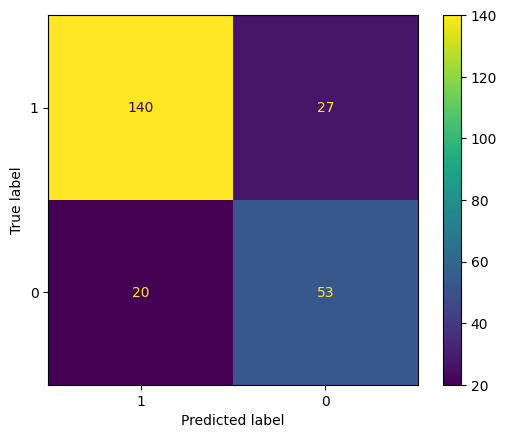

In [14]:
cm1gini = confusion_matrix(y_test, y_pred)
print(cm1gini)

cn=cd['stroke'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf1gini, X_test, y_test, display_labels=cn)

#### Findings:

- True Positives (TP) : This reflects the number of instances accurately identified as belonging to the positive class, and it equals 53 here.
- False Positives (FP) : This indicates the number of instances incorrectly classified as positive when they are actually negative, and it equals 27 here.


- True Negatives (TN) : This represents the number of instances accurately identified as belonging to the negative class, and it equals 140 here.
- False Negatives (FN) : This shows the number of instances incorrectly classified as negative when they are, in fact, positive, and it equals 20 here.


<br>
*This classifier is having good accuracy, because most tuples are represented along the diagonal(TN + TP) of the confusion matrix.*

In [15]:
# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm1gini[1, 1]
TN = cm1gini[0, 0]
FP = cm1gini[0, 1]
FN = cm1gini[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Sensitivity: 0.726027397260274
Specificity: 0.8383233532934131
Precision: 0.6625


#### Findings:

- Sensitivity: 0.72 - The model correctly identifies 72% of actual positive cases (strokes), missing 28%.

- Specificity: 0.83 - The model accurately detects 83% of actual negative cases (no strokes), with a 17% false positive rate.

- Precision: 0.66 - When predicting strokes, the model is correct 66% of the time, suggesting a need to reduce false positives.


<br>
*Overall, the model shows good specificity but moderate sensitivity and precision, highlighting opportunities for improvement to enhance detection and reduce misclassifications.*

### - Visualizing and Saving Decision Trees:

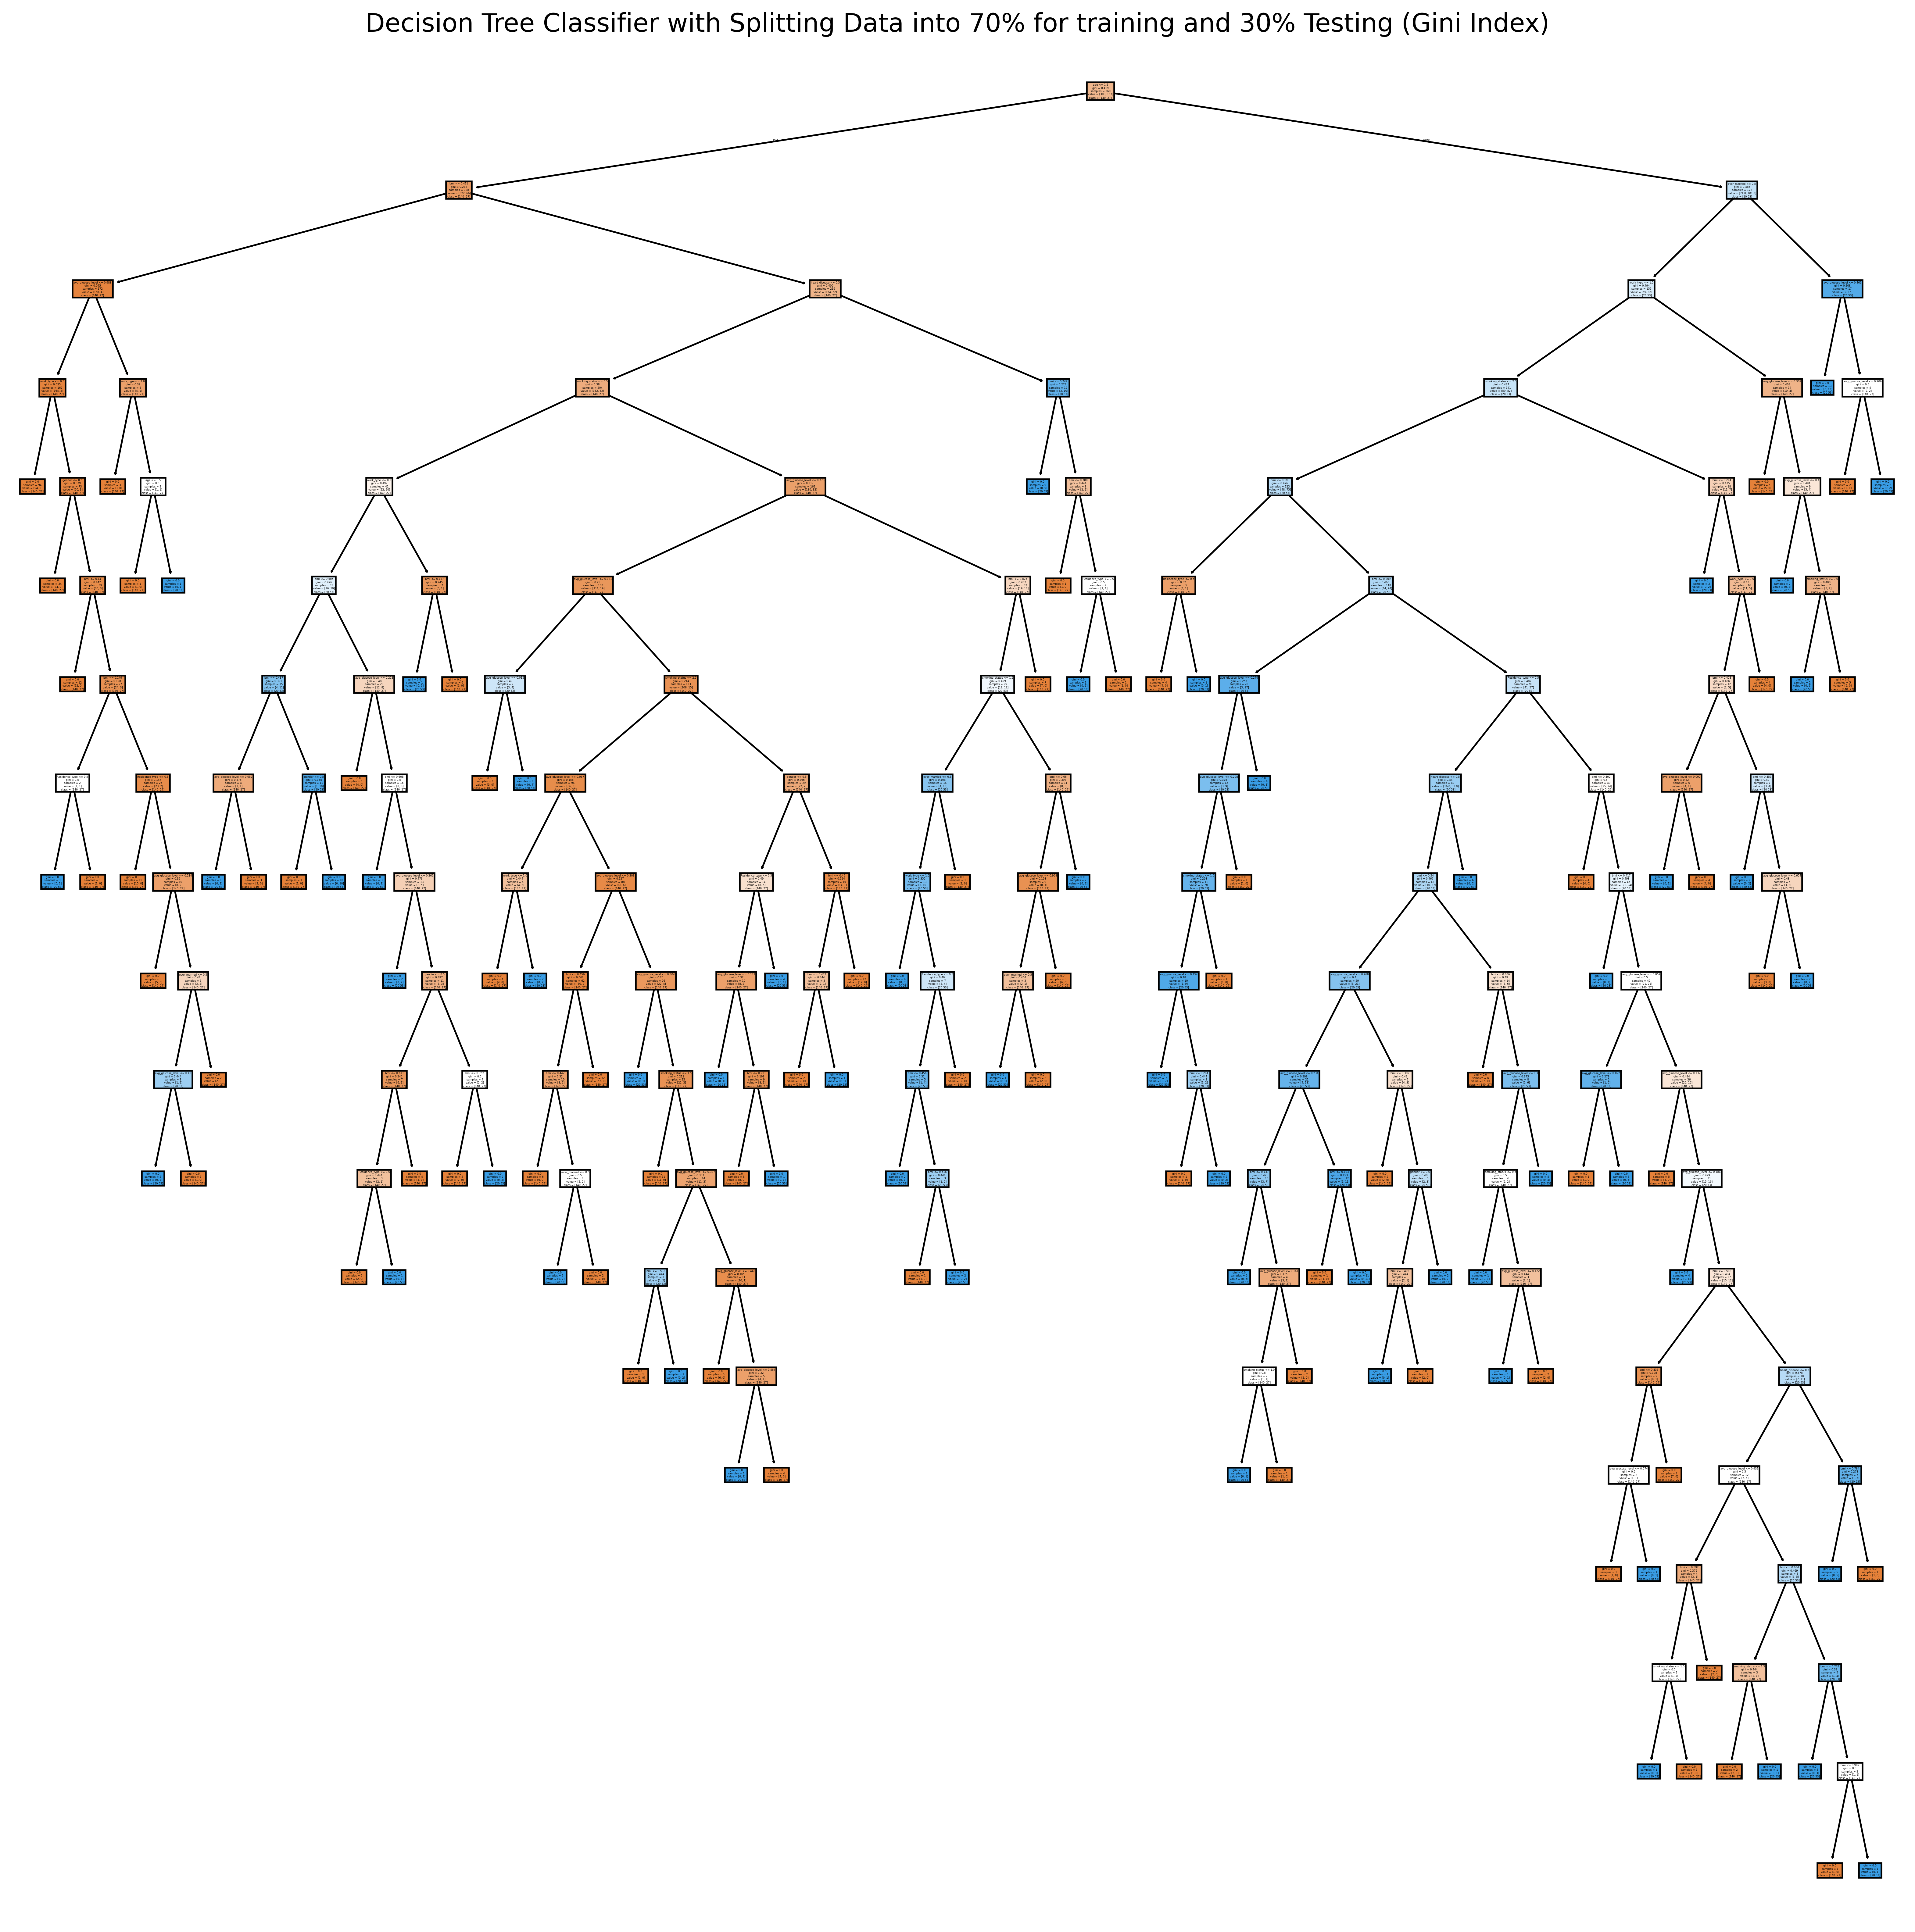

In [16]:
# Ensure class_names is a list of strings
cm1gini = [str(name) for name in cm1gini]

fig, ax = plt.subplots(figsize=(20, 20), dpi=400)

tree.plot_tree(clf1gini,
               feature_names=fn,
               class_names=cm1gini,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 70% for training and 30% Testing (Gini Index)", fontsize=15, loc='center')
plt.show()
fig.savefig('Gini3070DT.png')

The image illustrates a decision tree model for classification, using the Gini Index as the splitting criterion. The dataset is split into 70% for training and 30% for testing. The tree begins with “age” as the root node, which plays a critical role in the initial classification.

In this tree, the condition on the age node is evaluated as follows: if age <= 15, the condition is false, and the model proceeds to check the next node, “ever married”. This node splits the data further based on marital status, directing individuals along different paths depending on whether they are married or not.

However, if age > 15, the condition on the age node is true. In this case, the model moves to the next decision node, “BMI”, where the classification is further refined based on the individual’s body mass index.

After these initial decisions, the model continues branching down, using additional features in a specific order to make further splits at each level. These nodes might include attributes such as average glucose level, hypertension status, heart disease, work type, residence type, and smoking status. Each node along the path serves as a decision checkpoint, progressively narrowing down the classification.

Each path from the root to a leaf node represents a unique sequence of decisions, leading to a specific classification outcome at the end. With multiple levels and branches, the tree captures data complexity by focusing on essential features at each split to create increasingly homogeneous groups in each branch. This structured decision-making process results in terminal nodes (leaves) that consistently represent the predicted class for each subset, offering insight into how various features influence the classification.



---


---



## **Splitting data into 80% for Training and 20% for Testing:**

## - Information Gain (Entropy):

### - Model Training and Testing:

In [17]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# createdecision tree classifier object
clf2ent = DecisionTreeClassifier(criterion='entropy', random_state=1)

#Train decision tree classifier
clf2ent= clf2ent.fit(X_train, y_train)

# Make predictions
y_pred = clf2ent.predict(X_test)

# Compute Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )

Accuracy: 0.8625


### - Model Evaluation:

#### Confusion Matrix:


[[102  14]
 [  8  36]]


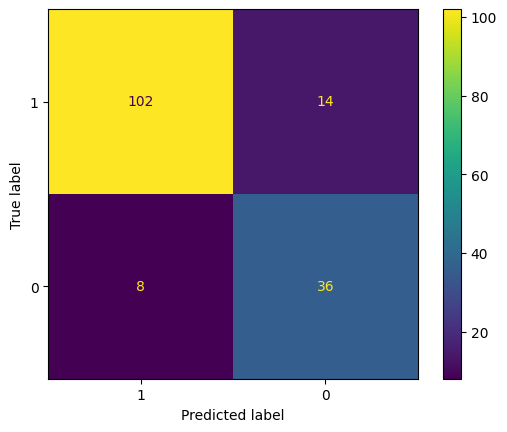

In [18]:
cm2ent = confusion_matrix(y_test, y_pred)
print(cm2ent)

cn=cd['stroke'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf2ent, X_test, y_test, display_labels=cn)

#### Findings:

- True Positives (TP) : This reflects the number of instances accurately identified as belonging to the positive class, and it equals 102 here.
- False Positives (FP) : This indicates the number of instances incorrectly classified as positive when they are actually negative, and it equals 8 here.


- True Negatives (TN) : This represents the number of instances accurately identified as belonging to the negative class, and it equals 36 here.
- False Negatives (FN) : This shows the number of instances incorrectly classified as negative when they are, in fact, positive, and it equals 14 here.


<br>
*This classifier is having good accuracy, because most tuples are represented along the diagonal(TN + TP) of the confusion matrix.*

In [19]:
# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm2ent[1, 1]
TN = cm2ent[0, 0]
FP = cm2ent[0, 1]
FN = cm2ent[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

Sensitivity: 0.8181818181818182
Specificity: 0.8793103448275862
Precision: 0.72


#### Findings:

- Sensitivity: 0.8 - The model correctly identifies 80% of actual positive cases (strokes), missing 32%.

- Specificity: 0.87 - The model accurately detects 87% of actual negative cases (no strokes), with a 22% false positive rate.

- Precision: 0.72 - When predicting strokes, the model is correct 72% of the time, suggesting a need to reduce false positives.


<br>
*Overall, the model shows good specificity but moderate sensitivity and precision, highlighting opportunities for improvement to enhance detection and reduce misclassifications.*

### - Visualizing and Saving Decision Trees:

In [ ]:
# Ensure class_names is a list of strings
cm2ent = [str(name) for name in cm2ent]

fig, ax = plt.subplots(figsize=(15, 15), dpi=400)

tree.plot_tree(clf2ent,
               feature_names=fn,
               class_names=cm2ent,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 80% for training and 20% Testing (Entropy)", fontsize=10, loc='center')
plt.show()
fig.savefig('Entropy8020DT.png')

The decision tree model is predicting stroke cases primarily relies on **age** as the initial splitting criterion (root node), reflecting its strong correlation with stroke risk which give it the lowest entropy value. Subsequent splits are made based on attributes like BMI for non Older Adult individuals and Marrige status for Older Adults, followed by factors such as average glucose level, hypertension, heart disease, work type, residence type, and smoking status. These attributes are selected to maximize information gain at each node, leading to increasingly homogeneous subsets. The final leaves of the tree represent the predicted class (stroke or no stroke). The model's reliance on these attributes highlights their importance in determining stroke risk, and the tree's structure provides a visual representation of the decision-making process.



---



## - Gini Index:

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train the Decision Tree Classifier with Gini index
clf2gini = DecisionTreeClassifier(criterion="gini", random_state=1)
clf2gini = clf2gini.fit(X_train, y_train)

# Make predictions
y_pred = clf2gini.predict(X_test)

# Compute Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

### - Model Evaluation:

#### Confusion Matrix:


In [ ]:
cm2gini = confusion_matrix(y_test, y_pred)
print(cm2gini)

cn=cd['stroke'].unique() #classes_names

disp = ConfusionMatrixDisplay.from_estimator(clf2gini, X_test, y_test, display_labels=cn)

#### Findings:

- True Positives (TP) : This reflects the number of instances accurately identified as belonging to the positive class, and it equals 96 here.
- False Positives (FP) : This indicates the number of instances incorrectly classified as positive when they are actually negative, and it equals 9 here.


- True Negatives (TN) : This represents the number of instances accurately identified as belonging to the negative class, and it equals 20 here.
- False Negatives (FN) : This shows the number of instances incorrectly classified as negative when they are, in fact, positive, and it equals 35 here.


<br>
*This classifier is having good accuracy, because most tuples are represented along the diagonal(TN + TP) of the confusion matrix.*

In [ ]:
# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm2gini[1, 1]
TN = cm2gini[0, 0]
FP = cm2gini[0, 1]
FN = cm2gini[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

#### Findings:

- Sensitivity: 0.80 - The model correctly identifies 80% of actual positive cases (strokes), missing 31.8%.

- Specificity: 0.82 - The model accurately detects 82% of actual negative cases (no strokes), with a 16.4% false positive rate.

- Precision: 0.63 - When predicting strokes, the model is correct 63% of the time, suggesting a need to reduce false positives.


<br>
*Overall, the model shows good specificity but moderate sensitivity and precision, highlighting opportunities for improvement to enhance detection and reduce misclassifications.*

### - Visualizing and Saving Decision Trees:

In [ ]:
# Ensure class_names is a list of strings
cm2gini = [str(name) for name in cm2gini]  # Convert class names to strings

fig, ax = plt.subplots(figsize=(20, 20), dpi=400)

tree.plot_tree(clf2gini,
               feature_names=fn,
               class_names=cm2gini,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 80% for training and 20% Testing (Gini Index)", fontsize=10,  loc='center')
plt.show()
fig.savefig('Gini2080DT.png')

The decision tree model is predicting stroke cases primarily relies on **age** as the initial splitting criterion (root node), reflecting its strong correlation with stroke risk which give it the lowest entropy value. Subsequent splits are made based on attributes like BMI for non Older Adult individuals and Marrige status for Older Adults, followed by factors such as average glucose level, hypertension, heart disease, work type, residence type, and smoking status. These attributes are selected to maximize information gain at each node, leading to increasingly homogeneous subsets. The final leaves of the tree represent the predicted class (stroke or no stroke). The model's reliance on these attributes highlights their importance in determining stroke risk, and the tree's structure provides a visual representation of the decision-making process.

the general splitting is apprixemitly as same as Entropy constructing, but this has less splittings in higher levels in the tree which is less than in the entropy, it produces a simpler tree structure compared to one using Entropy.

In contrast to the previous tree, which used entropy to maximize information gain and thus generated splits based on the highest reduction in uncertainty, this Gini-based tree focuses on minimizing class impurity. This difference leads to slight variations in the choice of attributes at each split, reflecting how the Gini index and entropy prioritize different aspects of the data. The final leaves of the tree represent the predicted class (stroke or no stroke), and the model’s structure visually encapsulates the step-by-step decision-making process. The reliance on specific attributes across both trees, despite the differing criteria, highlights their consistent importance in stroke prediction.



---



---



## **Splitting Data into 60% for training and 40% Testing**

## - Information Gain (Entropy):

In [ ]:
# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# createdecision tree classifier object
clf3ent = DecisionTreeClassifier(criterion='entropy', random_state=1)

#Train decision tree classifier
clf3ent= clf3ent.fit(X_train, y_train)

# Make predictions
y_pred = clf3ent.predict(X_test)

# Compute Accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_pred) )

#### Confusion Matrix:

In [ ]:
#printing confussion matrix :
cm3ent = confusion_matrix(y_test, y_pred)
print(cm3ent)

cn=cd['stroke'].unique() #classes_names

# create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf3ent, X_test, y_test, display_labels=cn)

#### Findings:

- True Positives (TP) : This reflects the number of instances accurately identified as belonging to the positive class, and it equals 188  here.
- False Positives (FP) : This indicates the number of instances incorrectly classified as positive when they are actually negative, and it equals 31 here.


- True Negatives (TN) : This represents the number of instances accurately identified as belonging to the negative class, and it equals 69 here.
- False Negatives (FN) : This shows the number of instances incorrectly classified as negative when they are, in fact, positive, and it equals 32 here.


<br>
*This classifier is having good accuracy, because most tuples are represented along the diagonal(TN + TP) of the confusion matrix.*

In [ ]:
# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3ent[1, 1]
TN = cm3ent[0, 0]
FP = cm3ent[0, 1]
FN = cm3ent[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

#### Findings:

- Error Rate: 0.206 - The model misclassifies about 20.6% of instances, means that model has good accuracy.

- Sensitivity: 0.69 - The model correctly identifies 69% of actual positive cases (strokes), missing 31%.

- Specificity: 0.854 - The model accurately detects 85.4% of actual negative cases (no strokes), with a 14.6% false positive rate.

- Precision: 0.69 - When predicting strokes, the model is correct 69% of the time, suggesting a need to reduce false positives.


<br>
*Overall, the model shows good specificity but moderate sensitivity and precision, highlighting opportunities for improvement to enhance detection and reduce misclassifications.*

### - Visualizing Visualizing and Saving Decision Trees:

In [ ]:
# Ensure class_names is a list of strings
cm3ent = [str(name) for name in cm3ent]

fig, ax = plt.subplots(figsize=(20, 20), dpi=400)

tree.plot_tree(clf3ent,
               feature_names=fn,
               class_names=cm3ent,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 60% for training and 40% Testing (Entropy)", fontsize=10,  loc='center')
plt.show()
fig.savefig('Entropy4060DT.png')


The image depicts a decision tree model for classification, using The image depicts a decision tree model designed for classification, using Entropy as the criterion to determine splits. This method aims to maximize information gain at each decision point, allowing the model to effectively separate data into distinct classes. The dataset is divided into 60% for training and 40% for testing, enabling the model to learn from a majority of the data before evaluating its accuracy on unseen data. The decision tree begins with “age” as the root node, indicating that age is a highly influential feature in the initial stages of classification, and serves as a primary factor in distinguishing between different classes.

At the root node, the model evaluates the condition based on age, which creates the first split in the data. If the condition on the age node is met, the model proceeds to the left child node, where it further analyzes "BMI" (Body Mass Index) to refine the classification. This step indicates that BMI plays a significant role in further dividing the data and providing additional clarity for classification. On the other hand, if the age condition is not met, the model branches to the right child node, which evaluates the "ever married" feature. This node examines marital status as an important criterion to make further distinctions, allowing the model to segment individuals based on whether they have been married.

As the model extends down the tree, it applies additional conditions on features like glucose levels, hypertension, heart disease, work type, residence, and smoking status. Each feature progressively refines the classification, building from the broader initial split at the root to more specific groupings. For example, after age, BMI and marital status play key roles in defining further splits, emphasizing these features’ relevance to the classification process.

Each path from the root to a leaf node represents a unique sequence of decisions, ending in a classification outcome. This structured decision-making reflects the interaction of various features, capturing complex patterns while maintaining interpretability. Using entropy to guide splits maximizes information gain at each node, resulting in clearer, more homogenous groups that support accurate classification. Overall, the tree emphasizes the importance of age, BMI, and marital status, revealing how these factors influence the classification and contribute to the model’s predictive power.



---



## - Gini Index:

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Train the Decision Tree Classifier with Gini index
clf3gini = DecisionTreeClassifier(criterion="gini", random_state=1)
clf3gini = clf3gini.fit(X_train, y_train)

# Make predictions
y_pred = clf3gini.predict(X_test)

# Compute Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

#### Confusion Matrix:

In [ ]:
#printing confussion matrix :
cm3gini = confusion_matrix(y_test, y_pred)
print(cm3gini)

cn=cd['stroke'].unique() #classes_names

# create confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf3gini, X_test, y_test, display_labels=cn)

#### Findings:

- True Positives (TP) : This reflects the number of instances accurately identified as belonging to the positive class, and it equals 185 here.
- False Positives (FP) : This indicates the number of instances incorrectly classified as positive when they are actually negative, and it equals 28 here.


- True Negatives (TN) : This represents the number of instances accurately identified as belonging to the negative class, and it equals 72 here.
- False Negatives (FN) : This shows the number of instances incorrectly classified as negative when they are, in fact, positive, and it equals 35 here.


<br>
*This classifier is having good accuracy, because most tuples are represented along the diagonal(TN + TP) of the confusion matrix.*

In [ ]:
# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm3gini[1, 1]
TN = cm3gini[0, 0]
FP = cm3gini[0, 1]
FN = cm3gini[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

#### Findings:

- Error Rate: 0.20 - The model misclassifies about 20% of instances, means that model has good accuracy.

- Sensitivity: 0.72 - The model correctly identifies 72% of actual positive cases (strokes), missing 28%.

- Specificity: 0.8409 - The model accurately detects 84% of actual negative cases (no strokes), with a 16% false positive rate.

- Precision: 0.67 - When predicting strokes, the model is correct 67% of the time, suggesting a need to reduce false positives.


<br>
*Overall, the model shows good specificity but moderate sensitivity and precision, highlighting opportunities for improvement to enhance detection and reduce misclassifications.*

### - Visualizing Visualizing and Saving Decision Trees:

In [ ]:
# Ensure class_names is a list of strings
cm3gini = [str(name) for name in cm3gini]  # Convert class names to strings

fig, ax = plt.subplots(figsize=(20, 20), dpi=400)

tree.plot_tree(clf3gini,
               feature_names=fn,
               class_names=cm3gini,
               filled=True)

plt.title("Decision Tree Classifier with Splitting Data into 60% for training and 40% Testing (Gini Index)", fontsize=10,  loc='center')
plt.show()
fig.savefig('Gini4060DT.png')

The image shows a classification decision tree model that uses the Gini Index as its splitting criterion, with a 60% training and 40% testing data split. The tree starts with "age" as the root node, highlighting its significance in the classification process.

At the root, a condition on age initiates the first split. If this condition is true, the tree branches left to the "heart disease" node for further classification. If false, it branches right to evaluate "ever married," helping to separate classes based on marital status.

As the tree grows, additional features like BMI, glucose levels, hypertension, work type, residence type, and smoking status contribute to further splits at different levels. Each split refines the classification path, with branches grouping data based on feature values. Every path from the root to a leaf represents a distinct series of decisions that leads to a classification outcome.

Overall, this Gini-based decision tree effectively captures relationships among features, especially age, heart disease, and marital status. The Gini Index helps maximize the purity of each split, leading to more uniform groups within branches and supporting accurate classification.

---

---



## Models Results Evaluation:
### Information Gain (Entropy) Results:

| Metric       | 70% Training, 30% Testing | 80% Training, 20% Testing | 60% Training, 40% Testing |
|--------------|---------------------------|---------------------------|---------------------------|
| **Accuracy**    | 83%                     | 80%                     | 80%                     |
| **Sensitivity** | 72%                       | 80%                       | 69%                       |
| **Specificity** | 87%                       | 87%                       | 85%                       |
| **Precision**   | 70%                       | 72%                       | 68%                       |


based on the results provided, here’s a summary of findings for the model's performance across different training and testing splits:

- The highest accuracy is observed with the 70% training and 30% testing split at 83% while splits yield an accuracy of 80%.
<br>
This suggests that while a larger training set (80%) doesn’t notably improve accuracy, a balanced split of 70% may lead to marginally better model performance.

- Sensitivity (True Positive Rate) is highest with the 80% training split at 80%, and the 60% training split has the lowest sensitivity at 69%.
<br>
This indicates that the model’s ability to correctly identify positive cases improves slightly with a larger training set, though it decreases with a higher testing set (40%).

- Specificity (True Negative Rate) is stable across the 70% and 80% training splits at 87%.
It slightly decreases to 85% with the 60% training split, suggesting that the model’s ability to correctly identify negative cases remains consistent but slightly declines when there is a larger testing set.

- Precision is highest with the 80% training split at 72%.
The 70% training split yields 70%, and the 60% split yields the lowest precision at 68%.
<br>
This indicates that the model’s accuracy in predicting true positives, relative to all positive predictions, slightly improves with a larger training set.

<br>

**Overall Insights**:

**Best Split:** The 70% training, 30% testing split provides the highest accuracy (83%) and maintains good specificity (87%). However, if sensitivity (80%) and precision (72%) are more critical, the 80% training split performs slightly better in those metrics.

**Trade-offs:** Increasing the training set size tends to improve sensitivity and precision but has a minimal effect on accuracy and specificity. The 60% training split, with the largest test set, shows a minor decline across all metrics.

<br>
In summary, the 70% training and 30% testing split offers a balanced trade-off between accuracy and specificity, while the 80% training split improves the model's sensitivity and precision marginally.

### Gini Index Results:

| Metric       | 70% Training, 30% Testing | 80% Training, 20% Testing | 60% Training, 40% Testing |
|--------------|---------------------------|---------------------------|---------------------------|
| **Accuracy**    | 80%                     | 81%                     | 80%                     |
| **Sensitivity** | 72%                       | 79%                       | 72%                       |
| **Specificity** | 83%                       | 82%                       | 84%                       |
| **Precision**   | 66%                       | 63%                       | 67%                       |



Based on the results provided, here’s a summary of findings for the model’s performance across different training and testing splits:

 1. Highest Accuracy (80% Training, 20% Testing):
The highest accuracy is observed with the 80% training and 20% testing split at 81%, while the 70% training, 30% testing and 60% training, 40% testing splits both yield an accuracy of 80%.
 • This suggests that a larger training set (80%) slightly improves the accuracy to 81%, but the 70% training split also achieves similar performance with only a 1% difference.
 2. Sensitivity (True Positive Rate):
Sensitivity is highest with the 80% training split at 79%, while both the 70% training and 60% training splits yield lower sensitivities at 72%.
 • This indicates that the model’s ability to correctly identify positive cases improves with a larger training set, reaching its peak at 79% with the 80% training split.
 3. Specificity (True Negative Rate):
Specificity is highest with the 60% training, 40% testing split at 84%. It is slightly lower with the 70% training split at 83% and with the 80% training split at 82%.
 • This suggests that the model’s ability to correctly identify negative cases improves when there is a larger testing set, as shown in the 60% training, 40% testing split.
 4. Precision:
Precision is highest with the 60% training split at 67%. The 70% training split yields a precision of 66%, and the 80% training split results in the lowest precision at 63%.
 • This indicates that the model’s accuracy in predicting true positives, relative to all positive predictions, improves with a larger testing set, as shown in the 60% training, 40% testing split.

Overall Insights:
 • Best Split: The 70% training, 30% testing split offers a good balance across metrics, with an accuracy of 80% and high specificity at 83%. However, if maximizing sensitivity is important, the 80% training split performs best in that metric at 79%. The 60% training split is optimal if precision (67%) and specificity (84%) are the primary concerns.
 • Trade-offs: Increasing the training set size tends to improve sensitivity, but this is at the expense of precision and, in some cases, specificity. A smaller training set, like the 60% split, yields higher precision and specificity but slightly lowers sensitivity.

In summary, the 70% training and 30% testing split provides a balanced trade-off across accuracy, sensitivity, specificity, and precision, making it a strong choice for overall performance. Meanwhile, the 80% training split is ideal if sensitivity is prioritized, and the 60% split is preferable for maximizing specificity and precision.

# Comparing Gini Index And Information Gain results :




---
| Metric       | Best Result/ split (Information Gain) | Best Result/ split (Gini Index)
|--------------|--------------------------------|---------------------------|
| **Accuracy**    | 83% using (70% Train, 30% Test) split                           | 81% using (80% Train, 20% Test) split   |
| **Sensitivity** | 80% using (80% Train, 20% Test) split                        | 79% using (80% Train, 20% Test) split |
| **Specificity** | 87% using (70% Train, 30% Test)    | 84% using (60% Train, 40% Test) split |
| **Precision**   | 72% using (80% Train, 20% Test) | 67% using (60% Train, 40% Test) split   |



**1. Accuracy**

*  **Information Gain:** The highest accuracy (83%) is observed with the 70% Training, 30% Testing split, while other splits yield 80%.

*  **Gini Index:** The highest accuracy (81%) occurs with the 80% Training, 20% Testing split, and the other splits achieve 80%.

**Conclusion:** Information Gain demonstrates better performance on accuracy with a balanced split of 70% training, 30% testing, whereas Gini Index achieves a slight improvement in accuracy with an 80% training split.

 **2. Sensitivity (True Positive Rate)**

*   **Information Gain:** Highest sensitivity is observed with the 80% Training, 20% Testing split at 80%.
*  **Gini Index:**  The highest sensitivity is also observed with the 80% Training, 20% Testing split but slightly lower at 79%.

**Conclusion:** Information Gain has a marginally higher sensitivity with an 80% training split, suggesting it may be better at identifying positive cases in this setup.



**3. Specificity (True Negative Rate)**

*   **Information Gain:**Achieves high specificity (87%) with both 70% and 80% Training splits, with a slight drop to 85% with a 60% training split.
*  ** Gini Index:** The highest specificity (84%) is with the 60% Training, 40% Testing split, while other splits are slightly lower.

**Conclusion:** Information Gain maintains better specificity across splits, particularly in the 70% and 80% training splits, showing stability in identifying true negatives.

**4. Precision**

*   **Information Gain:**Precision is highest (72%) with the 80% Training, 20% Testing split.
*  ** Gini Index**:The highest precision (67%) occurs with the 60% Training, 40% Testing split.

Conclusion: Information Gain offers higher precision with the 80% training split, whereas Gini Index benefits from a larger testing set to increase precision.



**Overall Insights**



*  **Best Split for Information Gain:**  The 70% Training, 30% Testing split achieves the highest accuracy and stable specificity, offering a balanced trade-off.
*  **Best Split for Gini Index:** The 70% Training, 30% Testing split also provides a balanced approach, but if sensitivity is critical, the 80% Training, 20% Testing split performs better.




**Summary**
Information Gain is superior in overall accuracy, specificity, and precision, making it generally more effective across splits.
Gini Index provides competitive sensitivity and precision in certain configurations but slightly trails in accuracy and specificity.
If accuracy and specificity are the primary goals, Information Gain is preferable. However, Gini Index might be useful when focusing on sensitivity with a slightly larger training set.

In [ ]:
partition_sizes = [0.2, 0.3, 0.4] #testing sizes in partitions

criterions = ["entropy", "gini"]

results = {}

for size in partition_sizes:
    for criterion in criterions:

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)

        clf = DecisionTreeClassifier(criterion=criterion, random_state=1)

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        results[(size, criterion)] = accuracy

for (size, criterion), accuracy in results.items():
    print(f"Partition Size: {size}, Criterion: {criterion}, Accuracy: {accuracy}")

sizes_entropy = [size for size, criterion in results if criterion == "entropy"]
accuracies_entropy = [results[(size, "entropy")] for size in sizes_entropy]
sizes_gini = [size for size, criterion in results if criterion == "gini"]
accuracies_gini = [results[(size, "gini")] for size in sizes_gini]

plt.figure(figsize=(10, 6))
plt.plot(sizes_entropy, accuracies_entropy, marker='o', label='Entropy')
plt.plot(sizes_gini, accuracies_gini, marker='o', label='Gini')
plt.title('Accuracy vs Partition Size')
plt.xlabel('Partition Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# **Clustering:**

Clustering is an unsupervised learning task that does not rely on labeled data. Therefore, we will remove the "stroke" class label from the dataset, as it is not needed for the clustering analysis. Since our dataset have a non numeric attributes, we needed to encode it first so we can work on the data.

After removing the "stroke" class label and encode the non numeric attribute, the next step is to scale the attributes to achieve standardization. Scaling the attributes ensures that they have comparable scales and prevents any particular attribute from dominating the clustering process due to differences in their magnitudes..

In [ ]:
# Load the preprocessed dataset
df = pd.read_csv('https://raw.githubusercontent.com/iRoseM/Brain-Stroke---Data-Mining-Project/main/Dataset%20Folder/Processed_dataset.csv')

# Extract the features (excluding the target variable, if any)
features = df.drop('stroke', axis=1)

# Mapping age labels to encoded values
age_mapping = {'Child': 0, 'Adult': 1, 'Older Adult': 2}
features['age'] = features['age'].map(age_mapping)

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Create a new DataFrame with the scaled features

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())

## K-means clustering:
K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct clusters based on their similarities. It assigns each data point to the nearest cluster centroid and iteratively updates the centroids to minimize the within-cluster sum of squared distances.

In [ ]:
# Perform k-means clustering with different values of k
k_values = range(2, 11)
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_result = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)
    silhouette_avg_values.append(silhouette_avg)

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)

# Find the second highest average Silhouette score and its corresponding number of clusters
silhouette_avg_values_sorted = sorted(silhouette_avg_values, reverse=True)
second_best_score = silhouette_avg_values_sorted[1]
second_best_k = k_values[silhouette_avg_values.index(second_best_score)]

# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

print(f"The highest average Silhouette score is {best_score} with k={best_k}.")
print(f"The second highest average Silhouette score is {second_best_score} with k={second_best_k}.")

as you can see above We found that the optimal number of clusters (k) maximizing the average Silhouette coefficient is 2, which will be our first k-means choice, and our second will be 3

## Elbow method:
The Elbow method is a technique used to determine the optimal number of clusters in a dataset for K-means clustering. It involves plotting the within-cluster sum of squares (inertia) as a function of the number of clusters. The inertia measures the compactness of the clusters, and the Elbow point represents the number of clusters where adding more clusters does not significantly reduce the inertia. The Elbow method helps in finding a balance between having a low inertia and avoiding overfitting.

In [ ]:
wss_values = []
X_scaled = scaler.fit_transform(X)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.inertia_)

plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow

plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()


turning point represents a different cluster configuration so k=7 will be our choice for the third k-means clustering. By considering this additional turning point, we aim to capture a diverse range of cluster formations and maximize the potential clustering performance.

## k-means clustering, visualization, and evaluation:
In this section, we will perform k-means clustering and visualize its result using three different k’s that have been chosen beforehand, then we will compute WSS and Bcubed preceision and recall and average silhouette for each cluster as methods of evaluating clustering results.

## **K=2**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()



* From the silhouette plot for clustering 800 samples into 2 centers using KMeans, most samples have positive silhouette scores, indicating that the samples are generally well-matched to their respective clusters and are reasonably distant from neighboring clusters.

* However, some samples have silhouette scores close to zero or even slightly negative, suggesting a minor degree of overlap or ambiguity between clusters.



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)


#### Findings:


*   
WSS: 5781.87 - The high WSS value suggests moderate cluster separation and compactness.

* Average Silhouette Score: 0.249 - The moderate silhouette score indicates reasonably well-defined clusters, but there may still be some overlap or ambiguity.





## **k=3**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=8953, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()



*   From the silhouette plot for clustering 800 samples into 3 centers using KMeans, the majority of samples have positive silhouette scores, supporting the notion that the clusters are well-formed.

*  However, similar to K=2, some samples in the second cluster have scores close to zero, indicating some overlap or ambiguity around cluster boundaries. There are also a few negative scores, suggesting that some samples may not be ideally clustered.



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

#### Findings:

*   
WSS: 4990.23 - The lower WSS value compared to K=2 suggests improved cluster separation and compactness.

* Average Silhouette Score: 0.214 - The relatively low silhouette score indicates some overlap or ambiguity in the cluster assignments, showing that clusters may not be ideally distinct.



## **K=7**

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=7
kmeans = KMeans(n_clusters=7, random_state=8953, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()



*  From the silhouette plot for clustering 800 samples into 7 centers using KMeans, the clustering shows a more refined separation among clusters, with most clusters exhibiting positive silhouette scores, indicating a higher quality of clustering compared to K=2 and K=3.

*   However, a few clusters still have scores close to zero, suggesting slight overlap at the edges of certain clusters. This larger number of clusters allows for a more granular analysis, potentially revealing unique subgroups within the data. The K=7 solution, with minimal negative silhouette scores, demonstrates improved cluster separation quality, making it a potentially optimal choice for detailed analysis.





In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=6
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

#### Findings:

* WSS: 3365.38 - The even lower WSS value indicates better separation and compactness of clusters compared to previous configurations.

*   
Average Silhouette Score: 0.207 - The lower silhouette score suggests some level of overlap or ambiguity between clusters, but the refined separation allows for more granular insights into the data.



## Evaluate the best models of Clustring:

|       | K=2 | K=3 | K=7 |
|--------------|---------------------------|---------------------------|---------------------------|
| **WSS**    | 5781.87                    |4990.23                   | 3365.38                    |
| **Average Silhouette Score** | 0.2499            |0.2142             | 0.2073                     |


We’ve decided that K=2 is the best choice for our clustering model based on the metrics we’ve analyzed (WSS, Average Silhouette Score, Visualization of K-mean). This choice is because K=2 gives the highest silhouette width, and also K=2 has the highest value of WSS compared to the WSS values for K=3 and K=7.

Additionally, having a silhouette plot of K-Means clustering of 800 samples with 2 centers was one of the most important criteria for choosing K=2 as the best K, indicating that it creates distinct and cohesive clusters.